In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots


In [2]:
dbFile = 'sims_featureScheduler_runs1.6/potential_schedulers/baseline_nexp1_v1.6_10yrs.db'
conn = db.OpsimDatabase(dbFile)

runName = 'baseline_nexp1_v1.6'
outDir = 'aa_linear'
resultsDb = db.ResultsDb(outDir=outDir)
runName='baseline_nexp1_v1.6'

In [3]:
nside=64
slicer = slicers.HealpixSlicer(nside=nside, latCol='altitude', lonCol='azimuth',
                                useCache=False)
metric = metrics.CountMetric('observationStartMJD', metricName='N obs')
plotFunc = plots.LambertSkyMap()

plotDict = {}

bundleList=[]
titles=['DDFs', 'Non DDFs']
#sql = ''
for title,sql in zip(titles, ['note like "%DD%"', 'note not like "%DD%"']):
    plotDict['title'] = runName+' '+title
    bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict,
                             plotFuncs=[plotFunc], runName=runName)
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint note like "%DD%" for columns ['observationStartMJD', 'altitude', 'azimuth']
Found 101663 visits
Running:  ['baseline_nexp1_v1_6_N_obs_note_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint note not like "%DD%" for columns ['observationStartMJD', 'altitude', 'azimuth']
Found 2130542 visits
Running:  ['baseline_nexp1_v1_6_N_obs_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note like "%DD%"" constraint now.
Plotting complete.
Plotting figures with "note not like "%DD%"" constraint now.
Plotting complete.


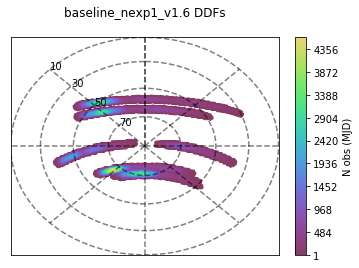

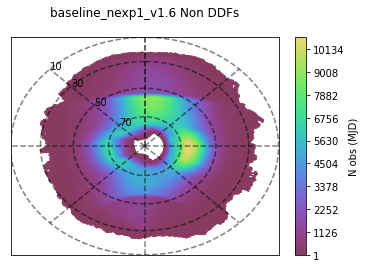

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)